In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [34]:
%matplotlib inline

In [35]:
data = pd.read_csv('MTA_130803_Pivotdown.txt')

## Let's take a look

In [36]:
data.head()

,C_A,UNIT,SCP,date,time,desc,entries,exits
0,A002,R051,02-00-00,07/27/2013,0:00:00,REGULAR,4209603,1443585
1,A002,R051,02-00-00,07/27/2013,4:00:00,REGULAR,4209643,1443593
2,A002,R051,02-00-00,07/27/2013,8:00:00,REGULAR,4209663,1443616
3,A002,R051,02-00-00,07/27/2013,12:00:00,REGULAR,4209741,1443687
4,A002,R051,02-00-00,07/27/2013,16:00:00,REGULAR,4210004,1443740


## Convert to datetime and use that as the index

In [37]:
def convert_to_datetime(row):
    return pd.to_datetime(row['date']+" "+row['time'], format="%m/%d/%Y %H:%M:%S")

In [38]:
data.index= data.apply(convert_to_datetime, axis=1)

In [39]:
data.head()

,C_A,UNIT,SCP,date,time,desc,entries,exits
2013-07-27 00:00:00,A002,R051,02-00-00,07/27/2013,0:00:00,REGULAR,4209603,1443585
2013-07-27 04:00:00,A002,R051,02-00-00,07/27/2013,4:00:00,REGULAR,4209643,1443593
2013-07-27 08:00:00,A002,R051,02-00-00,07/27/2013,8:00:00,REGULAR,4209663,1443616
2013-07-27 12:00:00,A002,R051,02-00-00,07/27/2013,12:00:00,REGULAR,4209741,1443687
2013-07-27 16:00:00,A002,R051,02-00-00,07/27/2013,16:00:00,REGULAR,4210004,1443740


## What range of days (and time) do we have?

In [40]:
data.index.min(), data.index.max()

(Timestamp('2013-07-27 00:00:00'), Timestamp('2013-08-02 23:59:27'))

## Looking at one day: Aug 1st

In [53]:
aug_1= data['2013-08-01']
aug_1.head(20)

,C_A,UNIT,SCP,date,time,desc,entries,exits
2013-08-01 00:00:00,A002,R051,02-00-00,08/01/2013,0:00:00,REGULAR,4215894,1445274
2013-08-01 04:00:00,A002,R051,02-00-00,08/01/2013,4:00:00,REGULAR,4215928,1445278
2013-08-01 08:00:00,A002,R051,02-00-00,08/01/2013,8:00:00,REGULAR,4215977,1445362
2013-08-01 12:00:00,A002,R051,02-00-00,08/01/2013,12:00:00,REGULAR,4216157,1445610
2013-08-01 16:00:00,A002,R051,02-00-00,08/01/2013,16:00:00,REGULAR,4216460,1445682
2013-08-01 20:00:00,A002,R051,02-00-00,08/01/2013,20:00:00,REGULAR,4217269,1445750
2013-08-01 00:00:00,A002,R051,02-00-01,08/01/2013,0:00:00,REGULAR,3982836,865549
2013-08-01 04:00:00,A002,R051,02-00-01,08/01/2013,4:00:00,REGULAR,3982869,865551
2013-08-01 08:00:00,A002,R051,02-00-01,08/01/2013,8:00:00,REGULAR,3982895,865599
2013-08-01 12:00:00,A002,R051,02-00-01,08/01/2013,12:00:00,REGULAR,3983056,865702


In [54]:
# get start entry and exit tallies per turnstile for that day
gr_24_min= aug_1.groupby(['C_A','UNIT','SCP'])[['entries','exits']].min().reset_index()
gr_24_min.rename(columns = {'entries':'start_entries','exits':'start_exits'}, inplace = True)

# get end entry and exit tallies per turnstile for that day
gr_24_max= aug_1.groupby(['C_A','UNIT','SCP'])[['entries','exits']].max().reset_index()
gr_24_max.rename(columns = {'entries':'end_entries','exits':'end_exits'}, inplace = True)

gr_24_max.drop(['C_A','UNIT','SCP'],axis=1,inplace=True)
gr_24 = pd.concat([gr_24_min,gr_24_max],axis=1)

del gr_24_max
del gr_24_min

In [55]:
gr_24.head()

,C_A,UNIT,SCP,start_entries,start_exits,end_entries,end_exits
0,A002,R051,02-00-00,4215894,1445274,4217269,1445750
1,A002,R051,02-00-01,3982836,865549,3983946,865802
2,A002,R051,02-03-00,157133,544563,157596,546630
3,A002,R051,02-03-01,3850198,6006360,3851325,6008456
4,A002,R051,02-03-02,3581518,4947096,3582677,4948932


## Entries and exits for that day
We'd be in trouble if we saw zero. And they are there.

In [56]:
gr_24['entries'] = gr_24.end_entries - gr_24.start_entries
gr_24['exits'] = gr_24.end_exits - gr_24.start_exits

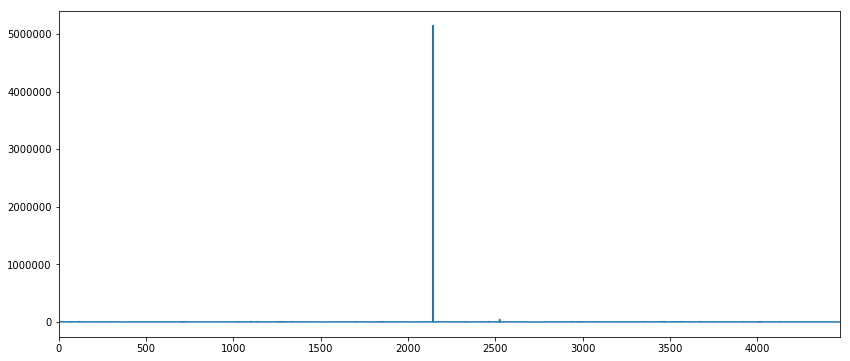

In [57]:
gr_24.entries.plot(figsize=(14,6))

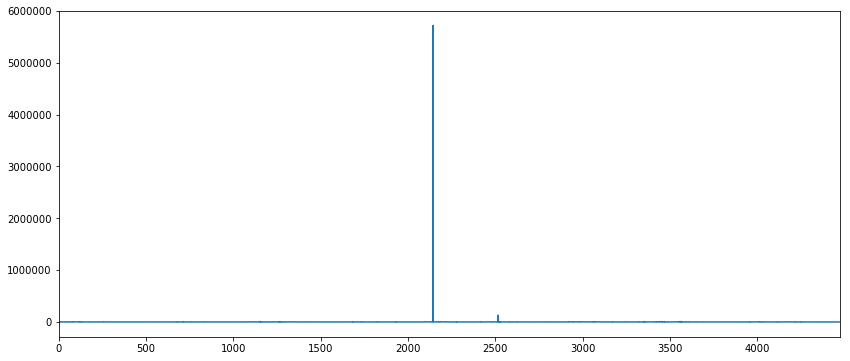

In [58]:
gr_24.exits.plot(figsize=(14,6))

In [59]:
gr_24.head()

,C_A,UNIT,SCP,start_entries,start_exits,end_entries,end_exits,entries,exits
0,A002,R051,02-00-00,4215894,1445274,4217269,1445750,1375,476
1,A002,R051,02-00-01,3982836,865549,3983946,865802,1110,253
2,A002,R051,02-03-00,157133,544563,157596,546630,463,2067
3,A002,R051,02-03-01,3850198,6006360,3851325,6008456,1127,2096
4,A002,R051,02-03-02,3581518,4947096,3582677,4948932,1159,1836


## Outliers are too high for both entries and exits?

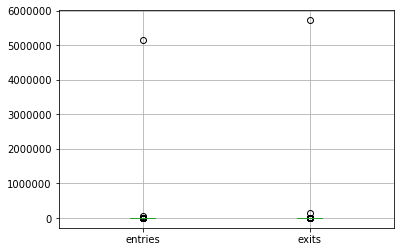

In [60]:
gr_24.boxplot(['entries','exits'])

In [49]:
gr_24.entries.max(), gr_24.exits.max()

(5155179, 5719177)

## Entries 

In [50]:
gr_24.entries.min(), gr_24.exits.min()

(0, 0)

In [52]:
gr_24.to_csv('01_08_2013_mta.csv', index=False)